In [10]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
df["Target"] = data.target
X,y = df.drop("Target", axis=1), df.Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = XGBRegressor(n_estimators = 100, learning_rate = 0.1)

In [12]:
model.fit (X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.8342267656242635
MSE: 0.22702465013941733


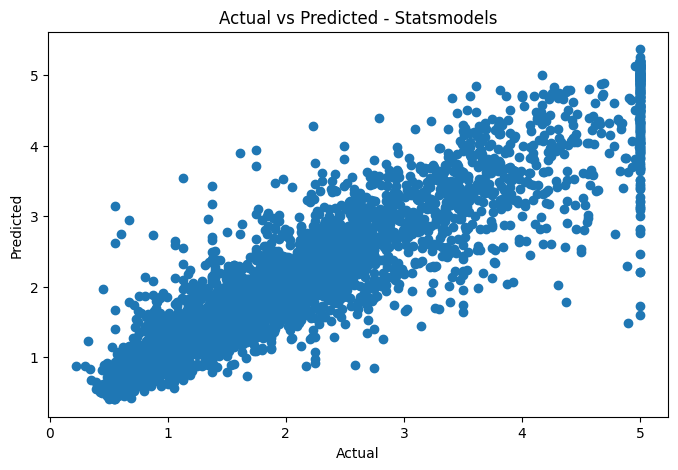

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Statsmodels")
plt.show()